<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [2]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

<ipython-input-2-b3fdaf15785b>:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


#### Read the dataset in the csv file from the URL


In [3]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [4]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


## Boxplot of Median Value of Owner-Occupied Homes (MEDV) ##

The code in the cell below will show the requested boxplot chart.

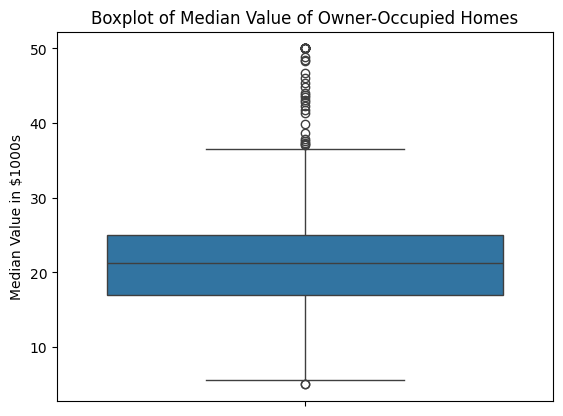

In [5]:
sns.boxplot(y='MEDV', data=boston_df)
pyplot.title('Boxplot of Median Value of Owner-Occupied Homes')
pyplot.ylabel('Median Value in $1000s')
pyplot.show()

## Bar Plot for Charles River Variable ##

The code in the cell below will show the requested bat plot chart

<function matplotlib.pyplot.show(close=None, block=None)>

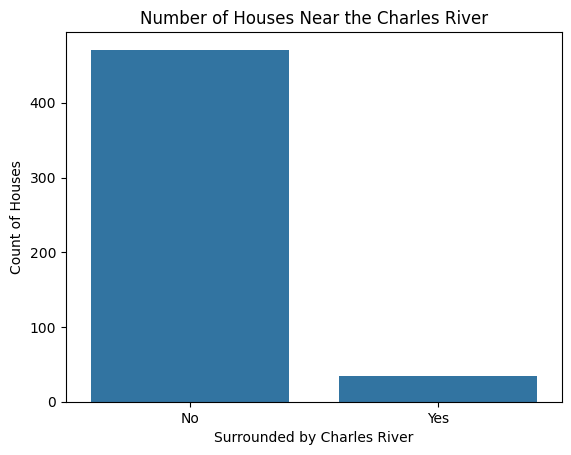

In [6]:
chas_counts = boston_df['CHAS'].value_counts()

sns.barplot(x=chas_counts.index, y=chas_counts.values)
pyplot.title('Number of Houses Near the Charles River')
pyplot.xlabel('Surrounded by Charles River')
pyplot.ylabel('Count of Houses')
pyplot.xticks(ticks=[0,1], labels=['No','Yes'])
pyplot.show

## Boxplot for MEDV vs Age ##
This code will show the boxplot for MEDV vs Age, where age is divided into 3 groups <35 years, 35-70 years, >70 years

In [ ]:
age_bins=[0,35,70, float('inf')]
age_labels=['35 years old and younger', '35-70 years old', '70 years old and older']
boston_df['AGE_Group']=pd.cut(boston_df['AGE'], bins=age_bins, labels=age_labels, right=False)

sns.boxplot(x='AGE_Group', y='MEDV', data=boston_df)
pyplot.title('Boxplot of Median Value of Owner-Occupied Homes by Age Group')
pyplot.xlabel('Age Group')
pyplot.ylabel('Median Value in $1000s')
pyplot.show

## Nitric Oxide Concentrations vs Non-retail Business Acres per town ##
The code in the box below wil show the scatter plot to show the relationship between the Nitric Oxide concentrations and the Non-retail business acres per town

<function matplotlib.pyplot.show(close=None, block=None)>

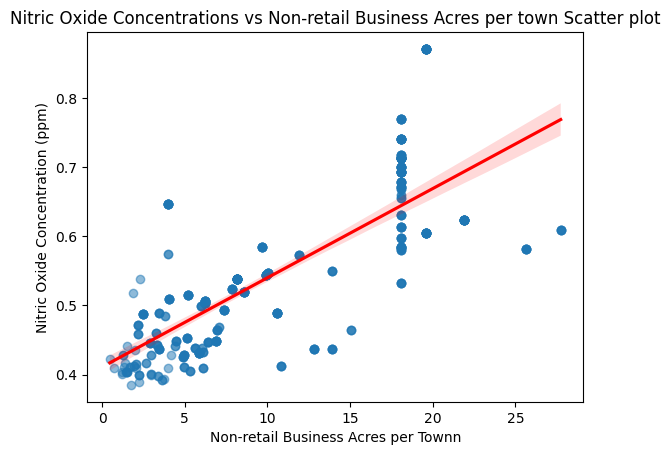

In [7]:
sns.regplot(x='INDUS', y='NOX', data=boston_df, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
pyplot.title('Nitric Oxide Concentrations vs Non-retail Business Acres per town Scatter plot')
pyplot.xlabel('Non-retail Business Acres per Townn')
pyplot.ylabel('Nitric Oxide Concentration (ppm)')
pyplot.show

*What can you say about the relationship?* 

Although, the correlation is not very strong, the correlation tends to be positive. The more non-retail business acres per town, the more nitric oxide concentration.

## Pupil to Teacher Ratio Histogram ##

The code in the box below shows the histogram representing the ratio between pupils and teachers

<function matplotlib.pyplot.show(close=None, block=None)>

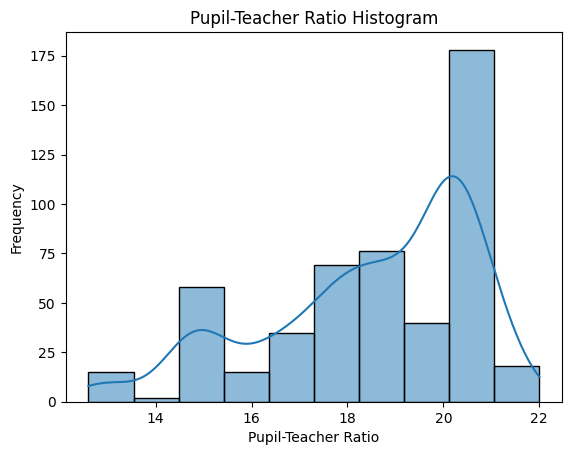

In [8]:
sns.histplot(boston_df['PTRATIO'], bins=10, kde=True)
pyplot.title('Pupil-Teacher Ratio Histogram')
pyplot.xlabel('Pupil-Teacher Ratio')
pyplot.ylabel('Frequency')
pyplot.show

## The following box will answer: Is there a significant difference in median value of houses bounded by the Charles river or not? by making a T-test for independent samples

In [24]:
chas_1=boston_df[boston_df['CHAS']==1]['MEDV']
chas_0=boston_df[boston_df['CHAS']==0]['MEDV']

print("First, let's define H0 \n     H0 = There is no difference in median value of houses bounded by the Charles river \nNote:The alpha value is 0.05 as instructed\n\n")

t_statistic, p_value = scipy.stats.ttest_ind(chas_1,chas_0)

print("T-Statistics:", t_statistic,"\n")
print("P-Value", p_value, "\n")

alpha=0.05
if p_value<alpha:
    print(f"As p-value {p_value} is lesser than the defined alpha {alpha} There is a significant difference in median values (Reject H0) \nThe median value of the houses bounded by the Charles River varies")
else:
    print(f"As p-value {p_value} is greater than the defined alpha {alpha} There is no significant difference in median values (Failed to reject H0) \nThe median value of the houses bounded by the Charles River does not vary")
    

First, let's define H0 
     H0 = There is no difference in median value of houses bounded by the Charles river 
Note:The alpha value is 0.05 as instructed


T-Statistics: 3.996437466090509 

P-Value 7.390623170519905e-05 

As p-value 7.390623170519905e-05 is lesser than the defined alpha 0.05 There is a significant difference in median values (Reject H0) 
The median value of the houses bounded by the Charles River varies



## The following box will answer: Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE) using an ANOVA test.

Note: the AGE field will use the same 3 categories defined previously, younger than 35, 35-70, and older than 70.


In [25]:
print("Let's define H0 as: There is no significant difference in the median values of houses (MEDV) among the different age groups (age_bins) based on the proportion of owner-occupied units built prior to 1940.\n\n")

age_bins = [0, 35, 70, float('inf')]
age_labels = ['35 years old and younger', '35-70 years old', '70 years old and older']
boston_df['age_bins'] = pd.cut(boston_df['AGE'], bins=age_bins, labels=age_labels, right=False)

boston_df['age_bins']=boston_df['age_bins'].astype('category')
anova_model=ols('MEDV ~ age_bins', data=boston_df).fit()
anova_table = sm.stats.anova_lm(anova_model, typ=2)
print(anova_table)

alpha=0.05
p_value=anova_table['PR(>F)']['age_bins']
if p_value < alpha:
    print(f"\n As PR(>F) ({p_value}) is lesser than the defined alpha ({alpha}) \n H0 is rejected. There is a significant difference in median values of houses (MEDV) among the different age groups.")
else:
    print(f"\n As PR(>F) ({p_value}) is greater than the defined alpha ({alpha}) \n Fail to reject H0: There is no significant difference in median values of houses (MEDV) among the different age groups.")

Let's define H0 as: There is no significant difference in the median values of houses (MEDV) among the different age groups (age_bins) based on the proportion of owner-occupied units built prior to 1940.


                sum_sq     df         F        PR(>F)
age_bins   5401.731883    2.0  36.40765  1.710501e-15
Residual  37314.563532  503.0       NaN           NaN

 As PR(>F) (1.7105011022701769e-15) is lesser than the defined alpha (0.05) 
 H0 is rejected. There is a significant difference in median values of houses (MEDV) among the different age groups.


## The following box will solve the question Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? Using a Pearson Correlation

In [26]:
print("Let's define H0 as: There is no relationship between Nitric Oxide concentrations (NOX) and the proportion of non-retail business acres per town (INDUS).")
from scipy.stats import pearsonr
correlation_coefficient, p_value = pearsonr(boston_df['NOX'], boston_df['INDUS'])
print(f"\nPearson correlation coefficient is: {correlation_coefficient}")
print(f"\nP-value is: {p_value}")
alpha=0.05
if p_value < alpha:
    print(f"\n As p-value ({p_value}) is lesser than the defined alpha ({alpha}) \n H0 is rejected.  There is a significant relationship between Nitric Oxide concentrations and the proportion of non-retail business acres per town.")
else:
    print(f"\n As p-value ({p_value}) is greater than the defined alpha ({alpha}) \n Fail to reject H0: There is no significant relationship between Nitric Oxide concentrations and the proportion of non-retail business acres per town.")

Let's define H0 as: There is no relationship between Nitric Oxide concentrations (NOX) and the proportion of non-retail business acres per town (INDUS).

Pearson correlation coefficient is: 0.7636514469209192

P-value is: 7.913361061210442e-98

 As p-value (7.913361061210442e-98) is lesser than the defined alpha (0.05) 
 H0 is rejected.  There is a significant relationship between Nitric Oxide concentrations and the proportion of non-retail business acres per town.


## The following box code will solve the question: What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied home? Using a Regression Analysis

In [27]:
print("Let's define H0 as: There is no impact of an additional weighted distance to the five Boston employment centers on the median value of owner-occupied homes (MEDV).\n")

X=boston_df['DIS']
y=boston_df['MEDV']
X=sm.add_constant(X)
model=sm.OLS(y,X).fit()
print(model.summary())

alpha = 0.05
p_value = model.pvalues['DIS']
f_statistic=model.fvalue


if p_value < alpha:
    print(f"\n As P>|t|) ({p_value}) is lesser than the defined alpha ({alpha}) \n H0 is rejected. There is a significant impact of an additional weighted distance to the five Boston employment centers on MEDV.")
else:
    print(f"\n As P>|t| ({p_value}) is greater than the defined alpha ({alpha}) \n Fail to reject H0: There is no significant impact of an additional weighted distance to the five Boston employment centers on MEDV.")

Let's define H0 as: There is no impact of an additional weighted distance to the five Boston employment centers on the median value of owner-occupied homes (MEDV).

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Tue, 24 Sep 2024   Prob (F-statistic):           1.21e-08
Time:                        21:50:40   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t  